In [7]:
import numpy as np

def svm_manual(X, y):
    w = np.array([1, 1])  # Define weights
    b = -6  # Define bias
    return lambda x: np.sign(np.dot(w, x) + b)  # Return a decision function

X = np.array([[1, 1], [2, 2], [2, 3], [3, 3], [6, 5], [7, 6], [8, 8], [7, 7]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])
svm = svm_manual(X, y)
# Test d’un point
print(svm([4, 4]))  # Devrait être positif (classe +1)
print(svm([6, 6]))  # Devrait être négatif (classe -1)

1
1


In [6]:
from sklearn.svm import SVC
import numpy as np
X = np.array([[1,1], [2,2], [2,3], [3,3], [6,5], [7,6], [8,8], [7,7]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])
svm = SVC(kernel='linear')
svm.fit(X, y)
# Test d’un point
print(svm.predict([[4, 4]])) # Devrait ^etre classe +1
print(svm.predict([[6, 6]])) # Devrait ^etre classe -1


[1]
[-1]


# TP : Support Vector Machine (SVM)  

## Objectif  
 

1. Implémenter un exemple simple à la main.  
2. Utiliser un jeu de données connu (`Iris`).  
3. Évaluer la qualité du modèle avec plusieurs métriques.  

## Théorie  
Un **SVM (Support Vector Machine)** est un modèle de classification qui trouve une **hyperplan** séparant les classes.  

Si les données sont **linéairement séparables**, il maximise la **marge** entre les classes.  

L’équation de l'hyperplan est :  
\[
w \cdot x + b = 0
\]
où \( w \) est le vecteur de poids et \( b \) le biais.  

Si les données ne sont **pas linéairement séparables**, on utilise un **noyau (kernel)** pour projeter les données dans un espace supérieur.


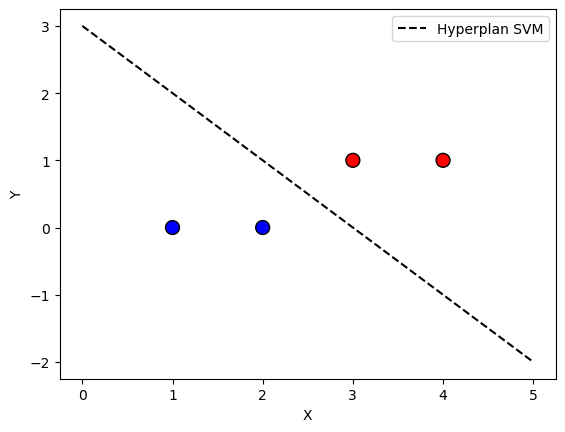

Prédiction pour X=2.5 : Classe 0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Données simples
X = np.array([[1, 0], [2, 0], [3, 1], [4, 1]])
Y = np.array([0, 0, 1, 1])

# Entraînement du modèle SVM linéaire
svm_model = SVC(kernel='linear')
svm_model.fit(X, Y)

# Visualisation de la séparation
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k', s=100)

# Affichage de la droite séparatrice
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_range = np.linspace(0, 5, 100)
y_range = -(w[0] * x_range + b) / w[1]

plt.plot(x_range, y_range, 'k--', label="Hyperplan SVM")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Prédiction pour X=2.5
X_test = np.array([[2.5, 0]])
Y_pred = svm_model.predict(X_test)
print(f"Prédiction pour X=2.5 : Classe {Y_pred[0]}")


Avec un jeu de données connu

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Charger le jeu de données Iris
iris = load_iris()
X = iris.data[:, :2]  # On prend 2 features pour affichage facile
Y = (iris.target == 0).astype(int)  # Classification binaire (Setosa vs non-Setosa)

# Séparation en données d'entraînement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Modèle SVM avec un noyau linéaire
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, Y_train)

# Prédictions
Y_pred = svm_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Exactitude : {accuracy:.2f}")
print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)


Exactitude : 1.00
Matrice de confusion :
 [[26  0]
 [ 0 19]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Interprétation des Résultats

## Matrice de Confusion
Elle indique la qualité de la classification :

|   | Prédit 0 | Prédit 1 |
|---|----------|----------|
| **Réel 0** | Vrai négatif (TN) | Faux positif (FP) |
| **Réel 1** | Faux négatif (FN) | Vrai positif (TP) |

## Critères d'Évaluation
- **Exactitude (Accuracy)** : proportion de prédictions correctes.  
- **Précision (Precision)** : parmi les prédictions positives, combien sont correctes.  
- **Rappel (Recall)** : parmi les vraies valeurs positives, combien sont bien détectées.  
- **F1-Score** : moyenne harmonique entre la précision et le rappel.  

## Conclusion
- Si l’exactitude est proche de **1**, le modèle est performant.  
- Une bonne classification a peu de **FN et FP**.  
- On peut essayer un **SVM non linéaire (kernel='rbf')** si les classes ne sont pas bien séparées linéairement !


# Exercice : SVM avec séparation non linéaire

Nous avons 10 points répartis en deux classes :

| X1  | X2  | Classe |
|-----|-----|--------|
|  1  |  2  |   0    |
|  2  |  3  |   0    |
|  3  |  3  |   0    |
|  5  |  1  |   1    |
|  6  |  2  |   1    |
|  6  |  5  |   1    |
|  7  |  3  |   0    |
|  8  |  4  |   1    |
|  9  |  3  |   1    |
|  10 |  5  |   1    |

On observe que ces points **ne sont pas séparables par une droite**.  



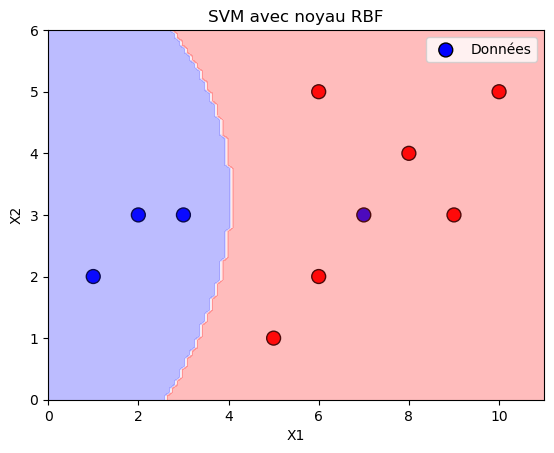

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Données non linéaires
X = np.array([
    [1, 2], [2, 3], [3, 3], [5, 1], [6, 2],
    [6, 5], [7, 3], [8, 4], [9, 3], [10, 5]
])
Y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])  # Classes 0 et 1

# Entraînement du SVM avec un noyau non linéaire (RBF)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X, Y)

# Tracé des points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k', s=100, label="Données")

# Tracé de la frontière de décision
xx, yy = np.meshgrid(np.linspace(0, 11, 100), np.linspace(0, 6, 100))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("SVM avec noyau RBF")
plt.show()


### Comment fonctionne un noyau RBF dans un SVM ?  

  
Un **SVM linéaire** ne peut séparer les données que par une **droite** (ou un hyperplan en dimension supérieure).  
Mais si les données sont **non linéairement séparables**, une simple droite ne suffit pas !  

Exemple : Imagine deux classes en forme de **cercles imbriqués**. Impossible de tracer une ligne droite qui les sépare.

---


Le **noyau RBF (Radial Basis Function)** projette les données dans un **espace de dimension supérieure** où elles deviennent séparables **linéairement**.

**Idée principale** :  
- Chaque point est transformé en fonction de sa distance aux autres points.
- Il devient plus facile de tracer une **droite** dans ce nouvel espace.

---
 
Le noyau RBF est défini comme :

$$
K(x, x') = \exp\left(-\gamma \| x - x' \|^2\right)
$$

où :  
- $ K(x, x') $ est la **similarité** entre deux points \( x \) et \( x' \).  
- $ \gamma $ contrôle l’influence d’un point donné (plus $ \gamma $ est grand, plus l’effet est local).  
- $ \| x - x' \|^2 $ est la distance euclidienne entre les points.  

---
 
 **Si deux points sont proches**, $ K(x, x') $ est proche de **1** (ils sont vus comme similaires).  
 **Si deux points sont éloignés**, $ K(x, x')$ tend vers **0** (ils sont vus comme différents).  
 Le modèle **déforme l’espace** de manière à rendre les classes **linéairement séparables** !  

---

Si on applique un SVM **linéaire** dans cet espace transformé, la séparation devient facile !  
C’est pour cela que le **noyau RBF** est souvent utilisé pour des données non linéaires.  


##  SVM avec un noyau non linéaire sur un jeu de données connu


Nous allons appliquer un **SVM avec un noyau RBF** sur un jeu de données **non linéairement séparable** appelé **"moons"**.  

  
Ce dataset contient deux classes en forme de **lune croissante**, ce qui le rend **non linéairement séparable**.

Nous allons :  
1. **Générer le dataset** avec `sklearn.datasets.make_moons()`.  
2. **Appliquer un SVM avec noyau RBF** (`kernel='rbf'`).  
3. **Visualiser la frontière de décision**.  
4. **Évaluer la performance du modèle**.  


Exactitude du modèle : 0.97
Rapport de classification :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.96      0.97        52

    accuracy                           0.97        90
   macro avg       0.96      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



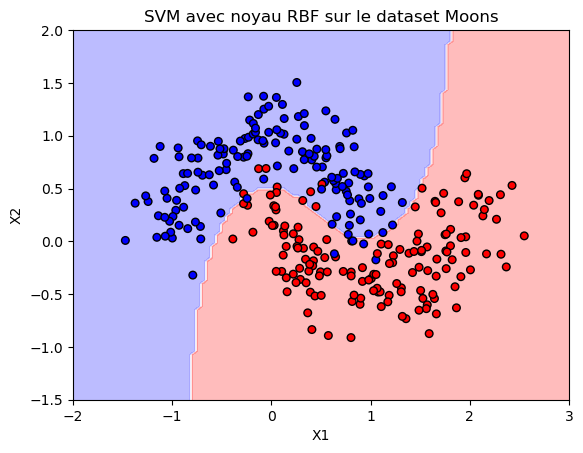

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Génération du jeu de données
X, Y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Séparation en entraînement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Entraînement du SVM avec un noyau RBF
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, Y_train)

# Prédictions et évaluation
Y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Exactitude du modèle : {accuracy:.2f}")
print("Rapport de classification :\n", classification_report(Y_test, Y_pred))

#  Visualisation de la frontière de décision
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-1.5, 2, 100))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k', s=30)
plt.title("SVM avec noyau RBF sur le dataset Moons")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


# TP : Régression Logistique  

## Objectif  
Ce notebook explore la régression logistique, une technique de classification binaire. Nous allons :  

1. Implémenter un exemple simple à la main.  
2. Utiliser un jeu de données connu (`Iris`).  
3. Évaluer la qualité de notre modèle avec plusieurs métriques.  

## Théorie  
La **régression logistique** modélise la probabilité qu'une observation appartienne à une classe donnée.  
La fonction sigmoïde est définie par :  

$$
P(Y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

On ajuste les coefficients \( \beta_0 \) et \( \beta_1 \) en minimisant l'erreur avec une **descente de gradient**.  



La régression logistique estime la probabilité qu’un événement se produise (a voté ou n’a pas voté par exemple), sur la base d’un jeu de données spécifique de variables indépendantes.

Ce type de modèle statistique (également appelé modèle logit) est souvent utilisé à des fins de classification et d’analytique prédictive. Comme le résultat est une probabilité, la variable dépendante est comprise entre 0 et 1. Dans la régression logistique, une transformation logit est appliquée aux odds, c’est-à-dire à la probabilité de succès divisée par la probabilité d’échec. Elle est également connue sous le nom de log-odds ou logarithme naturel de l’odds ratio, et cette fonction logistique est représentée par les formules suivantes : 

$$Logit(pi) = 1/(1+ exp(-pi))$$

$$ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k$$

Dans cette équation de régression logistique, logit(pi) est la variable dépendante ou de réponse et $x$ est la variable indépendante.

Le paramètre bêta, ou coefficient, de ce modèle est généralement estimé via l’estimateur du maximum de vraisemblance (MLE). 

On a un ensemble de données suivant :

| X | Y |
| --|--- |
| 1 |	0 |
| 2 |	0 |
| 3 |	1 |
| 4 |	1 |



   1.Trouver les coefficients $\beta_0$ et $\beta_1$ par la méthode du maximum de vraisemblance (simplifiée).

   2.Tracer la courbe sigmoïde correspondante.

   3.Prédire la valeur de YY pour X=2.5X=2.5.


In [12]:
import numpy as np

# Données
X = np.array([1, 2, 3, 4])
Y = np.array([0, 0, 1, 1])

# Fonction sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialisation des paramètres
beta_0, beta_1 = 0, 0
learning_rate = 0.1
epochs = 1000

# Descente de gradient
for _ in range(epochs):
    z = beta_0 + beta_1 * X
    predictions = sigmoid(z)
    
    # Gradient
    gradient_b0 = np.sum(predictions - Y) / len(Y)
    gradient_b1 = np.sum((predictions - Y) * X) / len(Y)
    
    # Mise à jour
    beta_0 -= learning_rate * gradient_b0
    beta_1 -= learning_rate * gradient_b1

print(f"beta_0: {beta_0}, beta_1: {beta_1}")

# Prédiction pour X = 2.5
X_new = 2.5
Y_pred = sigmoid(beta_0 + beta_1 * X_new)
print(f"Prédiction pour X=2.5: {Y_pred:.2f}")


beta_0: -5.696409201879285, beta_1: 2.386686539771847
Prédiction pour X=2.5: 0.57


Avec la librairie Scikit-learn

In [14]:
from sklearn.linear_model import LogisticRegression

# Reshape pour correspondre aux attentes de sklearn
X = X.reshape(-1, 1)

# Modèle
model = LogisticRegression()
model.fit(X, Y)

# Affichage des coefficients
print(f"beta_0: {model.intercept_[0]}, beta_1: {model.coef_[0][0]}")

# Prédiction pour X = 2.5
Y_pred = model.predict_proba([[2.5]])[0, 1]
print(f"Prédiction pour X=2.5: {Y_pred:.2f}")

beta_0: -2.395493512740578, beta_1: 0.9582010271218246
Prédiction pour X=2.5: 0.50


Avec un jeu de données connu



In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Charger le jeu de données Iris
iris = load_iris()
X = iris.data[:, :2]  # On prend 2 features pour affichage facile
Y = (iris.target == 0).astype(int)  # Classification binaire (classe "Setosa" vs non-Setosa)

# Séparation en données d'entraînement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, Y_train)

# Prédictions
Y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
auc_score = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])

print(f"Exactitude : {accuracy:.2f}")
print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)
print(f"Score AUC-ROC : {auc_score:.2f}")


Exactitude : 1.00
Matrice de confusion :
 [[26  0]
 [ 0 19]]
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Score AUC-ROC : 1.00


# Interprétation des Résultats

## Matrice de Confusion
La matrice de confusion nous montre combien de prédictions sont correctes et incorrectes.  
Elle a cette forme :

|   | Prédit 0 | Prédit 1 |
|---|----------|----------|
| **Réel 0** | Vrai négatif (TN) | Faux positif (FP) |
| **Réel 1** | Faux négatif (FN) | Vrai positif (TP) |

## Critères d'Évaluation
- **Exactitude (Accuracy)** : proportion de prédictions correctes.  
- **Précision (Precision)** : parmi les prédictions positives, combien sont correctes.  
- **Rappel (Recall)** : parmi les vraies valeurs positives, combien sont bien détectées.  
- **F1-Score** : moyenne harmonique de la précision et du rappel.  
- **AUC-ROC** : mesure la qualité de la classification. Plus proche de 1 = meilleur modèle.

## Conclusion
Si l’exactitude est proche de **1**, le modèle est performant.  
Si **AUC-ROC > 0.8**, la séparation des classes est bonne.  
Si **beaucoup de FN ou FP**, il faut améliorer le modèle !

